### **DESARROLLO DE LA TAREA DE CLASIFICACIÓN DE FLORES UTILIZANDO APRENDIZAJE PROFUNDO O DEEP LEARNING UTILIZANDO UNA RED NEURONAL CONVOLUCIONAL**

In [1]:
# Framework para interpretabilidad de una red neuronal
# !pip install lime
# !pip install scikit-image

In [2]:
# librerías para aprendizaje profundo
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [3]:
# Cargar los dataset de entrenamiento y prueba

train_dir = 'C:/Users/Usuario/Taller de Analítica/drive-download-20240416T231922Z-001/Dataset'
test_dir = 'C:/Users/Usuario/Taller de Analítica/drive-download-20240416T231922Z-001/Testing'

# Crear DataAugmentation para dar mayor variabilidad a las muestras

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Normalizar los valores, se ha demostrado que entre 0 y 1 la red puede entrenar mejor
test_datagen = ImageDataGenerator(rescale=1./255)

# Data de entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=2,
    class_mode='categorical'
)

# Data de prueba
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=2,
    class_mode='categorical'
)

# Construcción del modelo de red neuronal convolucional

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

# Compilar el modelo CNN
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenamiento del modelo
model.fit_generator(
    train_generator,
    steps_per_epoch=20,
    epochs=10,
    validation_data=test_generator,
    validation_steps=100
)

# Almacenamiento del modelo entrenado
model.save('C:/Users/Usuario/Taller de Analítica/drive-download-20240416T231922Z-001/model_entrenado.h5')

# Métricas de validación
score = model.evaluate_generator(test_generator, steps=800)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Found 60 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Epoch 1/10


C:\Users\Usuario\AppData\Local\Temp\ipykernel_16928\1164774422.py:59: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


20/20 [==============================] - 3s 95ms/step - loss: 1.1619 - accuracy: 0.2000 - val_loss: 1.0870 - val_accuracy: 0.3333
Epoch 2/10
20/20 [==============================] - 1s 30ms/step - loss: 1.0824 - accuracy: 0.3750
Epoch 3/10
20/20 [==============================] - 1s 30ms/step - loss: 0.7631 - accuracy: 0.6250
Epoch 4/10
20/20 [==============================] - 1s 30ms/step - loss: 0.7278 - accuracy: 0.5750
Epoch 5/10
20/20 [==============================] - 1s 30ms/step - loss: 0.5654 - accuracy: 0.7750
Epoch 6/10
20/20 [==============================] - 1s 30ms/step - loss: 0.6552 - accuracy: 0.6750
Epoch 7/10
20/20 [==============================] - 1s 29ms/step - loss: 0.5410 - accuracy: 0.7250
Epoch 8/10
20/20 [==============================] - 1s 30ms/step - loss: 0.5768 - accuracy: 0.7000
Epoch 9/10
20/20 [==============================] - 1s 32ms/step - loss: 0.4508 - accuracy: 0.8000
Epoch 10/10
20/20 [==============================] - 1s 32ms/step - loss: 0.52

C:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
C:\Users\Usuario\AppData\Local\Temp\ipykernel_16928\1164774422.py:71: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator, steps=800)


### **Implementación de la interpretabilidad para una red neuronal convolucional con el Framework LIME**

LIME (Local Interpretable Model-agnostic Explanations)

1. images[0].astype('double'):

images[0]: Selecciona la primera imagen de tu conjunto de imágenes (images).

.astype('double'): Convierte la imagen a tipo de dato double. LIME requiere que las entradas sean de tipo flotante para realizar operaciones matemáticas.

2. model.predict:

Es la función de predicción de tu modelo. LIME la usará para obtener predicciones del modelo y construir sus explicaciones.

3. top_labels=3:

Solicita que LIME genere explicaciones para las tres clases principales (las que tienen las mayores probabilidades de predicción).

4. hide_color=0:

Especifica el color que se usará para ocultar partes de la imagen durante el proceso de explicación. Un valor de 0 significa que no se ocultará ninguna parte de la imagen.

5. num_samples=1000:

Especifica el número de muestras que LIME utilizará para generar las explicaciones. Cuanto mayor sea este número, más preciso será el método LIME, pero también llevará más tiempo computacional.

C:\Users\Usuario\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 30ms/step


(-0.5, 63.5, 63.5, -0.5)

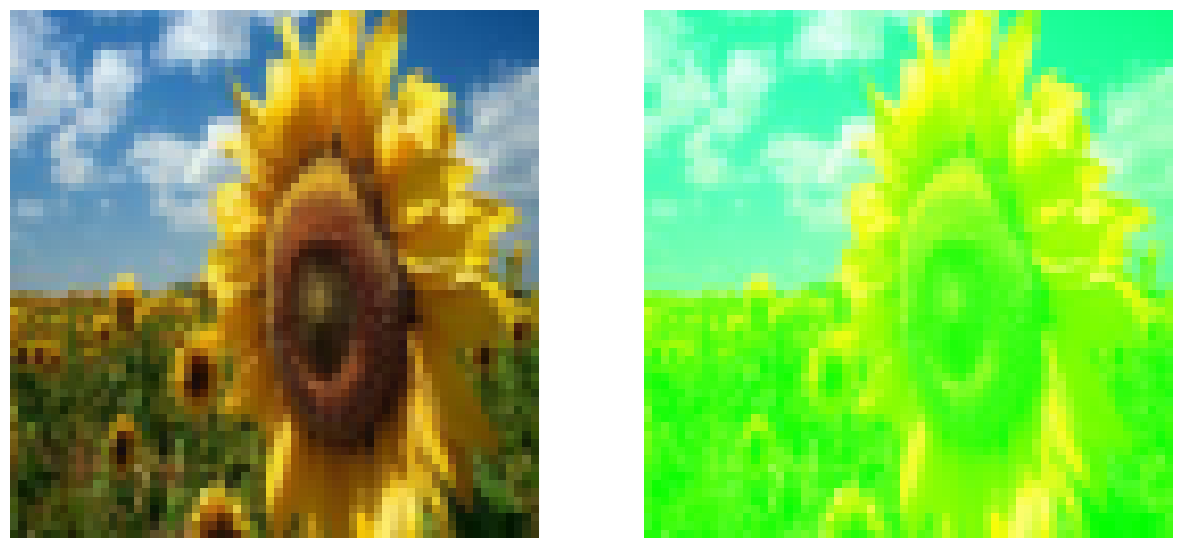

In [4]:
from lime import lime_image
import skimage
from skimage import io
from tensorflow.keras.preprocessing import image
from skimage.segmentation import mark_boundaries
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import h5py

# Cargar el archivo h5
with h5py.File('C:/Users/Usuario/Taller de Analítica/drive-download-20240416T231922Z-001/model_entrenado.h5', 'r') as f:
    # Obtener el modelo
    model = keras.models.load_model(f)

url = 'C:/Users/Usuario/Taller de Analítica/drive-download-20240416T231922Z-001/Testing/girasoles/girasolesTest001.jpeg'

def read_and_transform_img(url):
    img = skimage.io.imread(url)
    img = skimage.transform.resize(img, (64,64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

images = read_and_transform_img(url)

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(images[0].astype('double'), model.predict, top_labels=3, hide_color=0, num_samples=1000)
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')